In [9]:
import pandas as pd

def preprocess_data(csv_file):
    df = pd.read_csv(csv_file)
    
    # Convert data to transactional format
    transactions = []
    for index, row in df.iterrows():
        transaction = [col for col in df.columns[1:] if row[col] == 1]
        transactions.append(transaction)
    
    # Optionally, add disease name to each transaction for clarity
    diseases = df.iloc[:, 0].tolist()
    transactions_with_disease = list(zip(diseases, transactions))
    
    # Convert transactions to a binary format suitable for FP-Growth
    binary_transactions = []
    for transaction in transactions:
        binary_row = [1 if symptom in transaction else 0 for symptom in df.columns[1:]]
        binary_transactions.append(binary_row)
    
    return df, transactions_with_disease, binary_transactions

In [ ]:
# sample_size = 0.01
# full_df = pd.read_csv(csv_file)
# sampled_df = full_df.sample(frac=sample_size, random_state=42)
# temp_csv = './data/small_sample.csv'
# sampled_df.to_csv(temp_csv, index=False)
csv_file = './data/augmented_dataset.csv'
df, transactions_with_disease, binary_transactions = preprocess_data(csv_file)

In [11]:
binary_df = pd.DataFrame(binary_transactions, columns=df.columns[1:])
binary_df.to_csv('./data/preprocessed_binary_transactions.csv', index=False)
print(f"Binary transactions saved (shape: {binary_df.shape})")

# transactions_df = pd.DataFrame(transactions_with_disease)
# transactions_df.to_csv('./data/preprocessed_transactions_with_disease.csv', index=False)
# print(f"Transactions with disease saved (shape: {transactions_df.shape})")

Binary transactions saved (shape: (1481670, 377))


In [12]:
# Print results
print("Original DataFrame:")
print(df.head())
print("\nTransactions with Disease:")
print(transactions_with_disease[:5])
print("\nBinary Transactions:")
print(binary_transactions[:5])

Original DataFrame:
   diseases  anxiety and nervousness  depression  shortness of breath  \
0  cystitis                        0           0                    0   
1  cystitis                        0           0                    0   
2  cystitis                        0           0                    0   
3  cystitis                        0           0                    0   
4  cystitis                        0           0                    0   

   depressive or psychotic symptoms  sharp chest pain  dizziness  insomnia  \
0                                 0                 0          0         0   
1                                 0                 0          0         0   
2                                 0                 0          0         0   
3                                 0                 0          0         0   
4                                 0                 0          0         0   

   abnormal involuntary movements  chest tightness  ...  \
0            

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [2]:
binary_df = pd.read_csv('./data/preprocessed_binary_transactions.csv')
binary_df = binary_df.astype(bool)
print(f"Loaded preprocessed binary data with shape: {binary_df.shape}")

Loaded preprocessed binary data with shape: (1481670, 377)


In [3]:
# sample_size = 100000
# print(f"Creating sample of {sample_size} rows from original {binary_df.shape[0]} rows")
# binary_df_sample = binary_df.sample(n=min(sample_size, len(binary_df)), random_state=42)

min_support = 0.002
print(f"Finding frequent itemsets with minimum support of {min_support}")

frequent_itemsets = fpgrowth(binary_df, min_support=min_support, use_colnames=True)
print(f"Frequent itemsets found: {len(frequent_itemsets)}")

if len(frequent_itemsets) < 10:
    print("Few patterns found. Consider lowering min_support slightly (e.g., 0.03 or 0.01)")

Finding frequent itemsets with minimum support of 0.002


Frequent itemsets found: 3707


In [4]:
# min_support_large = 0.005 
# print(f"Finding frequent itemsets for 100,000 rows with min_support={min_support_large}")

# frequent_itemsets_large = fpgrowth(binary_df_sample, min_support=min_support_large, use_colnames=True)
# print(f"Frequent itemsets found with adjusted support: {len(frequent_itemsets_large)}")

# # Compare support distributions
# if len(frequent_itemsets) > 0 and len(frequent_itemsets_large) > 0:
#     print("\nSupport statistics for original min_support=0.02:")
#     print(frequent_itemsets['support'].describe())
    
#     print("\nSupport statistics for adjusted min_support=0.005:")
#     print(frequent_itemsets_large['support'].describe())

In [34]:
print("Frequent Itemsets:")
print(frequent_itemsets)
frequent_itemsets_df = pd.DataFrame(frequent_itemsets)
filename = "./output/rules/frequent_itemsets.csv"
frequent_itemsets_df.to_csv(filename, index=False)
print(f"Frequent itemsets saved to {filename}")

Frequent Itemsets:
       support                                           itemsets
0     0.131042                             (sharp abdominal pain)
1     0.042526                                        (side pain)
2     0.038204                                      (pelvic pain)
3     0.035055                                (painful urination)
4     0.033586                               (retention of urine)
...        ...                                                ...
3702  0.002457  (skin on leg or foot looks infected, abnormal ...
3703  0.002723                 (sore throat, swollen lymph nodes)
3704  0.002468                       (cough, swollen lymph nodes)
3705  0.002348           (neck stiffness or tightness, neck pain)
3706  0.002285            (headache, neck stiffness or tightness)

[3707 rows x 2 columns]
Frequent itemsets saved to ./output/rules/frequent_itemsets.csv


In [44]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'leverage', 'lift']]

In [45]:
# Display association rules
print("Association Rules:")
print(rules)  
rules_df = pd.DataFrame(rules)
filename = "./output/rules/association_rules.csv"
rules_df.to_csv(filename, index=False)
print(f"Association rules saved to {filename}")

Association Rules:
                               antecedents                consequents  \
0                              (side pain)     (sharp abdominal pain)   
1                              (side pain)                (back pain)   
2        (side pain, sharp abdominal pain)                (back pain)   
3                   (side pain, back pain)     (sharp abdominal pain)   
4        (lower abdominal pain, side pain)                (back pain)   
...                                    ...                        ...   
4532  (skin on leg or foot looks infected)  (abnormal appearing skin)   
4533                 (swollen lymph nodes)              (sore throat)   
4534                 (swollen lymph nodes)                    (cough)   
4535         (neck stiffness or tightness)                (neck pain)   
4536         (neck stiffness or tightness)                 (headache)   

       support  confidence  leverage       lift  
0     0.017135    0.402927  0.011562   3.074790  
1   

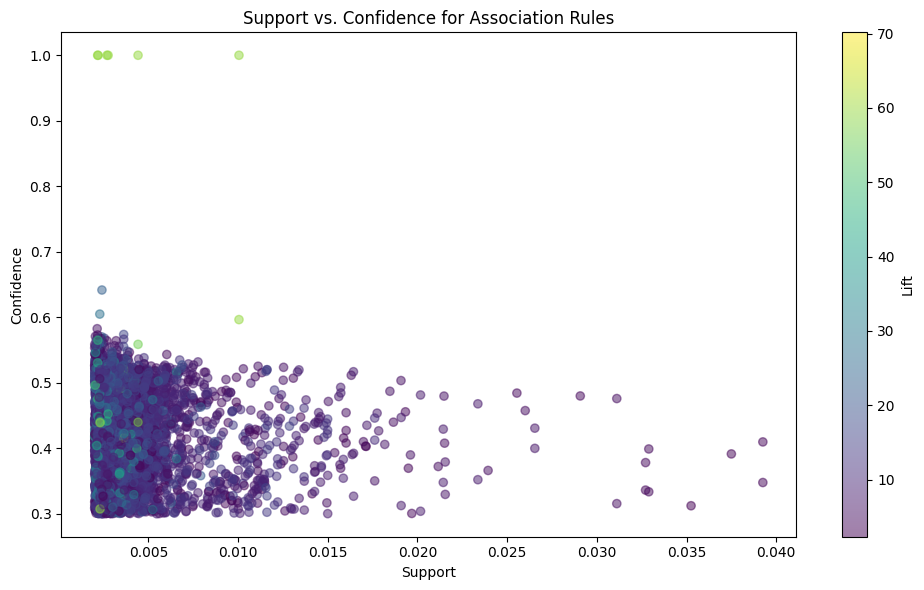

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence for Association Rules')
plt.tight_layout()
plt.show()

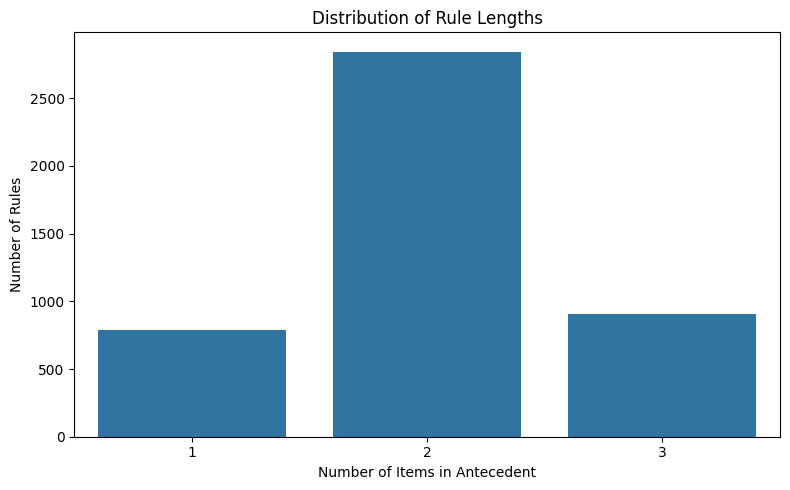

In [47]:
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))

plt.figure(figsize=(8, 5))
sns.countplot(x='antecedent_len', data=rules)
plt.xlabel('Number of Items in Antecedent')
plt.ylabel('Number of Rules')
plt.title('Distribution of Rule Lengths')
plt.tight_layout()
plt.show()

In [48]:
# high_support_threshold = 0.02
# high_confidence_threshold = 0.25

# low_support_threshold = 0.005
# low_confidence_threshold = 0.05

high_support_threshold = 0.004
high_confidence_threshold = 0.5

low_support_threshold = 0.003
low_confidence_threshold = 0.1

In [49]:
# rules = pd.DataFrame(rules)

significant_rules = rules[
    (rules['support'] >= high_support_threshold) &
    (rules['confidence'] >= high_confidence_threshold) &
    (rules['lift'] > 2.0)
]

semi_significant_rules = rules[
    (rules['support'] >= low_support_threshold) &
    (rules['confidence'] >= low_confidence_threshold) &
    (rules['lift'] > 1.2) &  
    ~rules.index.isin(significant_rules.index) # excludes significant rules
]

In [50]:
# Sort rules by a combined metric and take top 500
rules['combined_score'] = rules['support'] * rules['confidence'] * rules['lift'] 
top_rules = rules.sort_values('combined_score', ascending=False).head(500)

print(top_rules)

                                  antecedents  \
4455                          (regurgitation)   
4456                        (regurgitation.1)   
4464    (sharp abdominal pain, regurgitation)   
4458  (burning abdominal pain, regurgitation)   
4460                  (nausea, regurgitation)   
...                                       ...   
573                      (sore throat, fever)   
3627                               (insomnia)   
2973                        (excessive anger)   
2974                        (excessive anger)   
1647               (eye redness, pain in eye)   

                             consequents   support  confidence  leverage  \
4455                   (regurgitation.1)  0.010047    1.000000  0.009878   
4456                     (regurgitation)  0.010047    0.596466  0.009878   
4464                   (regurgitation.1)  0.004419    1.000000  0.004345   
4458                   (regurgitation.1)  0.002750    1.000000  0.002703   
4460                   (regurgi

In [51]:
print("Significant Rules: "+ str(len(significant_rules)))
print(significant_rules)

print("\nSemi-Significant Rules: " + str(len(semi_significant_rules)))
print(semi_significant_rules)

Significant Rules: 162
                                  antecedents             consequents  \
32        (lower abdominal pain, pelvic pain)  (sharp abdominal pain)   
103            (nausea, lower abdominal pain)  (sharp abdominal pain)   
169         (suprapubic pain, blood in urine)     (painful urination)   
209   (lower abdominal pain, suprapubic pain)     (painful urination)   
284                     (symptoms of bladder)    (retention of urine)   
...                                       ...                     ...   
4436                   (painful menstruation)  (sharp abdominal pain)   
4455                          (regurgitation)       (regurgitation.1)   
4456                        (regurgitation.1)         (regurgitation)   
4464    (sharp abdominal pain, regurgitation)       (regurgitation.1)   
4465  (sharp abdominal pain, regurgitation.1)         (regurgitation)   

       support  confidence  leverage       lift  antecedent_len  
32    0.007520    0.527182  0.0056

In [52]:
from collections import defaultdict

def calculate_symptom_cooccurrence(transactions_with_disease):
    cooccurrence_matrix = defaultdict(lambda: defaultdict(int))
    for disease, symptoms in transactions_with_disease:
        for i, symptom1 in enumerate(symptoms):
            for symptom2 in symptoms[i+1:]:
                cooccurrence_matrix[symptom1][symptom2] += 1
                cooccurrence_matrix[symptom2][symptom1] += 1
    return cooccurrence_matrix

In [53]:
def cluster_rules_by_cooccurrence(significant_rules, semi_significant_rules, cooccurrence_matrix, threshold=1):
    clustered_rules = defaultdict(list)

    all_rules = pd.concat([significant_rules, semi_significant_rules], ignore_index=True)

    for index, rule in all_rules.iterrows():
        antecedents = list(rule['antecedents'])
        cluster_key = tuple(sorted(antecedents))  # Use sorted tuple as cluster key

        # Check if any existing cluster has significant co-occurrence
        added_to_cluster = False
        for existing_cluster_key, existing_rules in clustered_rules.items():
            existing_antecedents = list(existing_cluster_key)
            # Calculate co-occurrence score between the current rule and existing cluster
            cooccurrence_score = 0
            for symptom1 in antecedents:
                for symptom2 in existing_antecedents:
                    cooccurrence_score += cooccurrence_matrix[symptom1][symptom2]

            if cooccurrence_score >= threshold:
                clustered_rules[existing_cluster_key].append(rule)
                added_to_cluster = True
                break

        # If no suitable cluster found, create a new cluster
        if not added_to_cluster:
            clustered_rules[cluster_key].append(rule)

    return clustered_rules

In [54]:
import ast
transactions_df = pd.read_csv('./data/preprocessed_transactions_with_disease.csv')

transactions_with_disease = []

for _, row in transactions_df.iterrows():
    # First column is disease - iloc for positional indexing
    disease = row.iloc[0]
    
    # convert the string back to a list
    symptoms = ast.literal_eval(row.iloc[1])
    
    # Create a tuple with disease and list of symptoms
    transaction = (disease, symptoms)
    transactions_with_disease.append(transaction)

In [55]:
print(f"Significant rules: {len(significant_rules)}")
print(f"Semi-significant rules: {len(semi_significant_rules)}")
print(f"Total before clustering: {len(significant_rules) + len(semi_significant_rules)}")

Significant rules: 162
Semi-significant rules: 2081
Total before clustering: 2243


In [56]:
cooccurrence_matrix = calculate_symptom_cooccurrence(transactions_with_disease)
clustered_rules = cluster_rules_by_cooccurrence(significant_rules, semi_significant_rules, cooccurrence_matrix)

In [81]:
# num_clusters = len(clustered_rules)
print(f"Number of clusters generated: {len(clustered_rules)}")

Number of clusters generated: 14


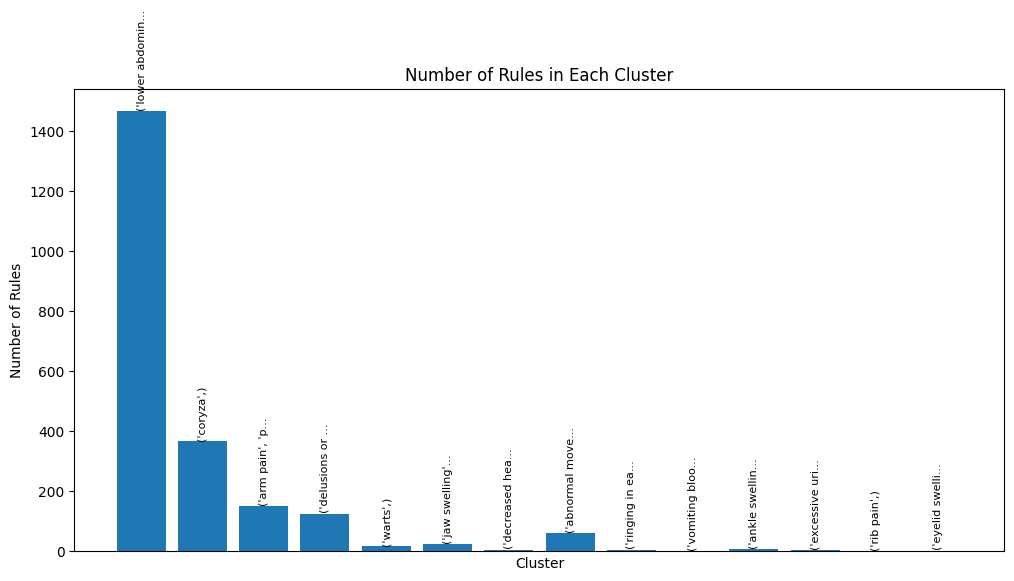

In [58]:
cluster_sizes = [len(rules) for cluster_key, rules in clustered_rules.items()]
cluster_keys = [str(key) for key in clustered_rules.keys()]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(cluster_sizes)), cluster_sizes)

for i, (bar, key) in enumerate(zip(bars, cluster_keys)):
    if len(key) > 15:
        key = key[:15] + "..."
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             key, ha='center', va='bottom', rotation=90, fontsize=8)

plt.xlabel('Cluster')
plt.ylabel('Number of Rules')
plt.title('Number of Rules in Each Cluster')
plt.xticks([])
plt.show()

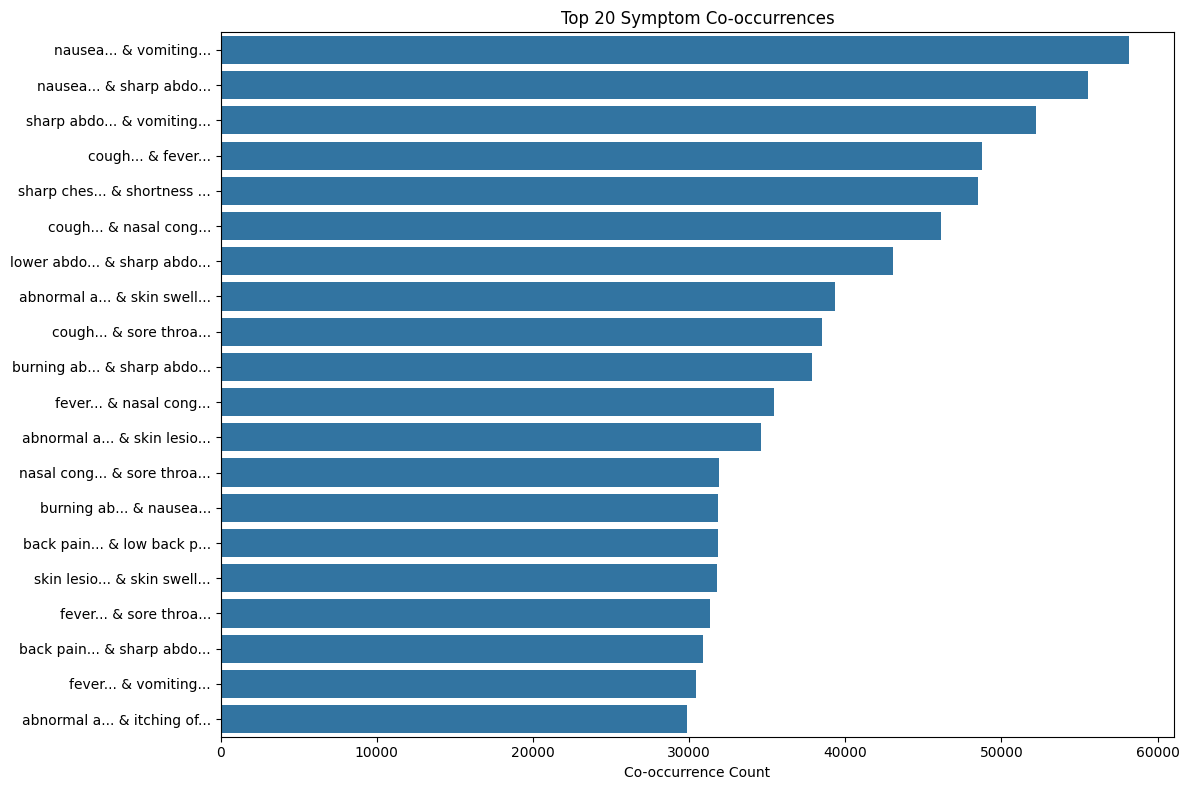

In [59]:
top_pairs = []
for symptom1, connections in cooccurrence_matrix.items():
    for symptom2, weight in connections.items():
        if symptom1 < symptom2:  # Avoid duplicates
            top_pairs.append((symptom1, symptom2, weight))

# Sort by weight and take top 20 pairs
top_pairs = sorted(top_pairs, key=lambda x: x[2], reverse=True)[:20]

pair_names = [f"{s1[:10]}... & {s2[:10]}..." for s1, s2, _ in top_pairs]
pair_weights = [w for _, _, w in top_pairs]

plt.figure(figsize=(12, 8))
sns.barplot(x=pair_weights, y=pair_names)
plt.title('Top 20 Symptom Co-occurrences')
plt.xlabel('Co-occurrence Count')
plt.tight_layout()
plt.show()

In [60]:
for cluster_key, rules in clustered_rules.items():
    print(f"Cluster: {cluster_key}")
    for rule in rules:
        print(rule)

Cluster: ('lower abdominal pain', 'pelvic pain')
antecedents       (lower abdominal pain, pelvic pain)
consequents                    (sharp abdominal pain)
support                                       0.00752
confidence                                   0.527182
leverage                                     0.005651
lift                                         4.023003
antecedent_len                                      2
Name: 0, dtype: object
antecedents       (nausea, lower abdominal pain)
consequents               (sharp abdominal pain)
support                                 0.007229
confidence                              0.501404
leverage                                 0.00534
lift                                    3.826287
antecedent_len                                 2
Name: 1, dtype: object
antecedents       (suprapubic pain, blood in urine)
consequents                     (painful urination)
support                                    0.004651
confidence                  

In [61]:
for cluster_key, rules in clustered_rules.items():
    rules_df = pd.DataFrame(rules)
    filename = f"./output/clusters/cluster_{cluster_key}.csv"
    rules_df.to_csv(filename, index=False)
    print(f"Association rules saved to {filename}")

Association rules saved to ./output/clusters/cluster_('lower abdominal pain', 'pelvic pain').csv
Association rules saved to ./output/clusters/cluster_('coryza',).csv
Association rules saved to ./output/clusters/cluster_('arm pain', 'paresthesia').csv
Association rules saved to ./output/clusters/cluster_('delusions or hallucinations', 'excessive anger').csv
Association rules saved to ./output/clusters/cluster_('warts',).csv
Association rules saved to ./output/clusters/cluster_('jaw swelling',).csv
Association rules saved to ./output/clusters/cluster_('decreased heart rate',).csv
Association rules saved to ./output/clusters/cluster_('abnormal movement of eyelid',).csv
Association rules saved to ./output/clusters/cluster_('ringing in ear',).csv
Association rules saved to ./output/clusters/cluster_('vomiting blood',).csv
Association rules saved to ./output/clusters/cluster_('ankle swelling',).csv
Association rules saved to ./output/clusters/cluster_('excessive urination at night',).csv
Ass

In [62]:
print("Co-occurrence Matrix:")
for symptom1, connections in cooccurrence_matrix.items():
    for symptom2, weight in connections.items():
        if weight > 0:
            print(f"  {symptom1} and {symptom2}: {weight}")

Co-occurrence Matrix:
  retention of urine and sharp abdominal pain: 16785
  retention of urine and painful urination: 14967
  retention of urine and pelvic pain: 1660
  retention of urine and side pain: 8021
  retention of urine and lower abdominal pain: 10462
  retention of urine and blood in urine: 17041
  retention of urine and back pain: 9091
  retention of urine and suprapubic pain: 11926
  retention of urine and frequent urination: 16400
  retention of urine and involuntary urination: 11891
  retention of urine and symptoms of bladder: 8878
  retention of urine and swelling of scrotum: 3071
  retention of urine and impotence: 5727
  retention of urine and excessive urination at night: 5404
  retention of urine and hesitancy: 2394
  retention of urine and low urine output: 1889
  retention of urine and symptoms of prostate: 4347
  retention of urine and pain in testicles: 4095
  retention of urine and blood in stool: 2575
  retention of urine and vomiting: 9118
  retention of uri

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

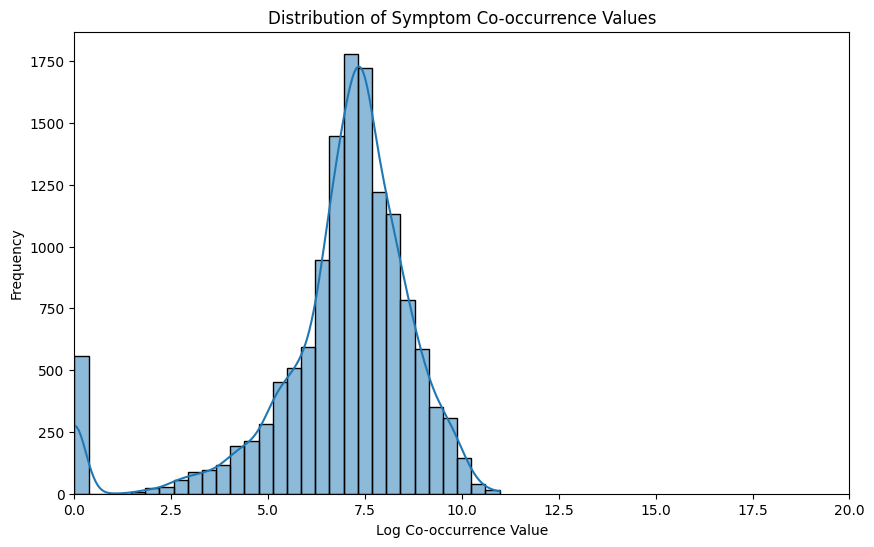

In [65]:
# Extract all co-occurrence values from the matrix
cooccurrence_values = []
for symptom1, connections in cooccurrence_matrix.items():
    for symptom2, weight in connections.items():
        cooccurrence_values.append(weight)

# Create a pandas Series from these values
cooccurrence_series = pd.Series(cooccurrence_values)

# Now plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(cooccurrence_series), kde=True, bins=30)
plt.xlabel('Log Co-occurrence Value')
plt.ylabel('Frequency')
plt.title('Distribution of Symptom Co-occurrence Values')
plt.xlim(0, 20)
plt.show()

In [66]:
import numpy as np

In [67]:
def calculate_cooccurrence_score(antecedents, consequents, cooccurrence_matrix):
    """Calculate co-occurrence score between symptoms"""
    cooccurrence_score = 0
    
    # Between antecedents
    for i, symptom1 in enumerate(antecedents):
        for symptom2 in antecedents[i+1:]:
            if symptom1 in cooccurrence_matrix and symptom2 in cooccurrence_matrix[symptom1]:
                cooccurrence_score += cooccurrence_matrix[symptom1][symptom2]
        
        # Between antecedents and consequents
        for symptom2 in consequents:
            if symptom1 in cooccurrence_matrix and symptom2 in cooccurrence_matrix[symptom1]:
                cooccurrence_score += cooccurrence_matrix[symptom1][symptom2]
                
    return cooccurrence_score

In [68]:
class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros(len(position))
        self.best_position = position

def fitness(rule):
    # Simplified fitness function for demonstration
    support = rule['support']
    confidence = rule['confidence']
    length = len(rule['antecedents'])
    return confidence * np.log(support * length + 1)


def update_velocity(particle, global_best, w=0.6, c1=1.5, c2=1.5):
    r1, r2 = np.random.rand(), np.random.rand()
    particle.velocity = w * particle.velocity + c1 * r1 * (particle.best_position - particle.position) + c2 * r2 * (global_best - particle.position)

def update_position(particle, num_rules):
    # Add velocity to position (results in floating point values)
    new_position = particle.position + particle.velocity
    
    # Round to nearest integer and convert to the right data type
    new_position = np.round(new_position).astype(np.int32)
    # Ensure the particle stays within valid bounds (0 to num_rules - 1)    
    particle.position = np.clip(new_position, 0, num_rules - 1)

def pso_optimization(clustered_rules, cooccurrence_matrix, num_particles=10, iterations=100, top_n=5):
    # Prepare the data for PSO
    all_rules = []
    for cluster_key, rules in clustered_rules.items():
        all_rules.extend(rules)

    if not all_rules:
        print("No rules to optimize.")
        return None

    num_rules = len(all_rules)
    # print(f"Optimizing across {num_rules} rules")

    # Initialize particles
    particles = [Particle(np.random.randint(0, num_rules, size=1)) for _ in range(num_particles)]
    
    # Track top N rules instead of just the global best
    top_rule_indices = set()  # Keep track of indices we've already added
    top_rules = []  # Will store (position, fitness, rule_index) tuples
    
    # PSO iterations
    for iter in range(iterations):

        # Keep track of the best position for each particle in this iteration
        particle_best_positions = []
        particle_best_fitnesses = []

        for particle in particles:
            # Evaluate fitness
            rule_index = particle.position[0]
            current_rule = all_rules[rule_index]
            particle_fitness = fitness(current_rule)

            # Update personal best
            personal_best_index = particle.best_position[0]
            if particle_fitness > fitness(all_rules[personal_best_index]):
                particle.best_position = particle.position.copy()

            # Store this particle's best for this iteration
            particle_best_positions.append(particle.best_position.copy())
            particle_best_fitnesses.append(fitness(all_rules[particle.best_position[0]]))
            
            # Only consider adding to top rules if this rule index isn't already there
            if rule_index not in top_rule_indices:
                # Check if this should be in top rules
                if len(top_rules) < top_n:
                    # Still building initial list
                    top_rules.append((particle.position.copy(), particle_fitness, rule_index))
                    top_rule_indices.add(rule_index)
                    # Sort by fitness (descending)
                    top_rules = sorted(top_rules, key=lambda x: x[1], reverse=True)
                elif particle_fitness > min([f for _, f, _ in top_rules]):
                    # Replace the worst rule in our top list
                    top_rules = sorted(top_rules, key=lambda x: x[1], reverse=True)
                    worst_rule = top_rules.pop()  # Remove worst rule
                    top_rule_indices.remove(worst_rule[2])  # Remove its index from our set
                    
                    # Add the new rule
                    top_rules.append((particle.position.copy(), particle_fitness, rule_index))
                    top_rule_indices.add(rule_index)
                    
                    # Re-sort
                    top_rules = sorted(top_rules, key=lambda x: x[1], reverse=True)

        # Find the global best among all particles for this iteration
        best_idx = np.argmax(particle_best_fitnesses)
        global_best_position = particle_best_positions[best_idx]
        
        # Update velocity and position for all particles
        for particle in particles:
            update_velocity(particle, global_best_position)
            update_position(particle, num_rules)

    # Process and return top rules
    if top_rules:
        return [all_rules[rule_idx] for _, _, rule_idx in top_rules]
    else:
        return None

In [69]:
def multi_run_pso(clustered_rules, cooccurrence_matrix, num_runs=10, num_particles=15, iterations=100, top_n=150):
    """
    Run PSO optimization multiple times and combine results
    """
    all_rules = []
    unique_rules_tracker = set()  # Track rules we've already seen
    
    for run in range(num_runs):
        # print(f"\n--- PSO Run {run+1}/{num_runs} ---")
        run_rules = pso_optimization(
            clustered_rules, 
            cooccurrence_matrix, 
            num_particles=num_particles, 
            iterations=iterations, 
            top_n=top_n
        )
        
        if run_rules:
            # Track only unique rules
            for rule in run_rules:
                # Create a tuple of frozensets to represent the rule uniquely
                rule_key = (
                    frozenset(rule['antecedents']), 
                    frozenset(rule['consequents']),
                    round(rule['support'], 6),  # Round to avoid float precision issues
                    round(rule['confidence'], 6)
                )
                
                if rule_key not in unique_rules_tracker:
                    # Calculate fitness score
                    fitness_score = fitness(rule)
                    
                    # Calculate co-occurrence score
                    antecedents = list(rule['antecedents'])
                    consequents = list(rule['consequents'])
                    cooccurrence_score = calculate_cooccurrence_score(
                        antecedents, consequents, cooccurrence_matrix
                    )
                    
                    # Calculate combined score
                    combined_score = rule['support'] * rule['confidence'] * rule['lift']
                    
                    # Add these scores to the rule
                    rule_copy = rule.copy()
                    rule_copy['fitness'] = fitness_score
                    rule_copy['cooccurrence_score'] = cooccurrence_score
                    rule_copy['combined_score'] = combined_score
                    
                    unique_rules_tracker.add(rule_key)
                    all_rules.append(rule_copy)
    
    # Sort rules by fitness score in descending order
    sorted_rules = sorted(all_rules, key=lambda x: x['fitness'], reverse=True)
    
    print(f"\nTotal unique rules found across {num_runs} PSO runs: {len(sorted_rules)}")
    return sorted_rules

In [70]:
combined_rules = multi_run_pso(clustered_rules, cooccurrence_matrix, num_runs=10)
combined_rules_df = pd.DataFrame(combined_rules)
columns = ['antecedents', 'consequents', 'fitness', 'support', 'confidence', 'lift', 'cooccurrence_score', 'combined_score']
combined_rules_df = combined_rules_df[columns]

pd.set_option('display.max_colwidth', 30) 

first_10 = combined_rules_df.head(10)
last_10 = combined_rules_df.tail(10)

print("\n----- Top 10 Rules by Fitness Score -----")
print(first_10.to_string(index=False))

print("\n----- Bottom 10 Rules by Fitness Score -----")
print(last_10.to_string(index=False))

pd.reset_option('display.max_colwidth')

combined_filepath = './output/rules/combined_best_rules.csv'
combined_rules_df.to_csv(combined_filepath, index=False)
print(f"Combined best rules saved to {combined_filepath}")


Total unique rules found across 10 PSO runs: 603

----- Top 10 Rules by Fitness Score -----
                     antecedents            consequents  fitness  support  confidence     lift  cooccurrence_score  combined_score
                        (nausea)             (vomiting) 0.015777 0.039256    0.409743 3.629784               58165        0.058385
              (nasal congestion)                (cough) 0.014582 0.031113    0.475949 4.827059               46099        0.071480
                        (nausea) (sharp abdominal pain) 0.014410 0.037501    0.391420 2.986980               55564        0.043845
(sharp abdominal pain, vomiting)               (nausea) 0.014331 0.016020    0.454408 4.742930              165964        0.034526
          (lower abdominal pain) (sharp abdominal pain) 0.013755 0.029077    0.479915 3.662302               43082        0.051105
  (nausea, sharp abdominal pain)             (vomiting) 0.013472 0.016020    0.427183 3.784285              165964       

In [71]:
def flatten(items):
    """Recursively flatten a set, frozenset, or tuple to a list of strings."""
    result = []
    if isinstance(items, (set, frozenset, tuple)):
        for i in items:
            result.extend(flatten(i))
    else:
        result.append(items)
    return result

In [72]:
def clean_label(x):
    # Recursively flatten and stringify any set, frozenset, or tuple
    if isinstance(x, (set, frozenset)):
        return ', '.join(sorted(clean_label(i) for i in x))
    elif isinstance(x, tuple):
        return ', '.join(sorted(clean_label(i) for i in x))
    else:
        return str(x)

In [73]:
from sklearn.model_selection import KFold

# Number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Function to evaluate a single rule on a dataset (same as before)
def evaluate_rule_on_data(rule, data_df): 
    antecedents = flatten(rule['antecedents'])
    consequents = flatten(rule['consequents'])

    antecedent_mask = data_df[antecedents].all(axis=1)
    consequent_mask = data_df[consequents].all(axis=1)
    both_mask = antecedent_mask & consequent_mask

    support = both_mask.mean()
    antecedent_support = antecedent_mask.mean()
    consequent_support = consequent_mask.mean()
    confidence = support / antecedent_support if antecedent_support > 0 else 0
    lift = confidence / consequent_support if consequent_support > 0 else 0

    return support, confidence, lift

# Evaluate top N rules using K-Fold
N = 50
rules_to_evaluate = combined_rules_df.head(N)

fold_results = []

for i, rule in rules_to_evaluate.iterrows():
    rule_results = {
        'Rule': f"{clean_label(rule['antecedents'])} => {clean_label(rule['consequents'])}",
        'Train Support': [],
        'Test Support': [],
        'Train Confidence': [],
        'Test Confidence': [],
        'Train Lift': [],
        'Test Lift': []
    }

    for train_index, test_index in kf.split(binary_df):
        train_df = binary_df.iloc[train_index]
        test_df = binary_df.iloc[test_index]

        train_support, train_conf, train_lift = evaluate_rule_on_data(rule, train_df)
        test_support, test_conf, test_lift = evaluate_rule_on_data(rule, test_df)

        rule_results['Train Support'].append(train_support)
        rule_results['Test Support'].append(test_support)
        rule_results['Train Confidence'].append(train_conf)
        rule_results['Test Confidence'].append(test_conf)
        rule_results['Train Lift'].append(train_lift)
        rule_results['Test Lift'].append(test_lift)

    fold_results.append({
        'Rule': rule_results['Rule'],
        'Avg Train Support': np.mean(rule_results['Train Support']),
        'Avg Test Support': np.mean(rule_results['Test Support']),
        'Avg Train Confidence': np.mean(rule_results['Train Confidence']),
        'Avg Test Confidence': np.mean(rule_results['Test Confidence']),
        'Avg Train Lift': np.mean(rule_results['Train Lift']),
        'Avg Test Lift': np.mean(rule_results['Test Lift']),
    })

kfold_validation_df = pd.DataFrame(fold_results)
print(kfold_validation_df)

kfold_validation_df.to_csv('./output/rules/rule_kfold_validation.csv', index=False)


                                                 Rule  Avg Train Support  \
0                                  nausea => vomiting           0.039256   
1                           nasal congestion => cough           0.031113   
2                      nausea => sharp abdominal pain           0.037501   
3            sharp abdominal pain, vomiting => nausea           0.016020   
4        lower abdominal pain => sharp abdominal pain           0.029077   
5            nausea, sharp abdominal pain => vomiting           0.016020   
6                                  vomiting => nausea           0.039256   
7                    fever, nasal congestion => cough           0.012534   
8                                      fever => cough           0.032897   
9            nausea, vomiting => sharp abdominal pain           0.016020   
10     burning abdominal pain => sharp abdominal pain           0.025543   
11            shortness of breath => sharp chest pain           0.032718   
12          

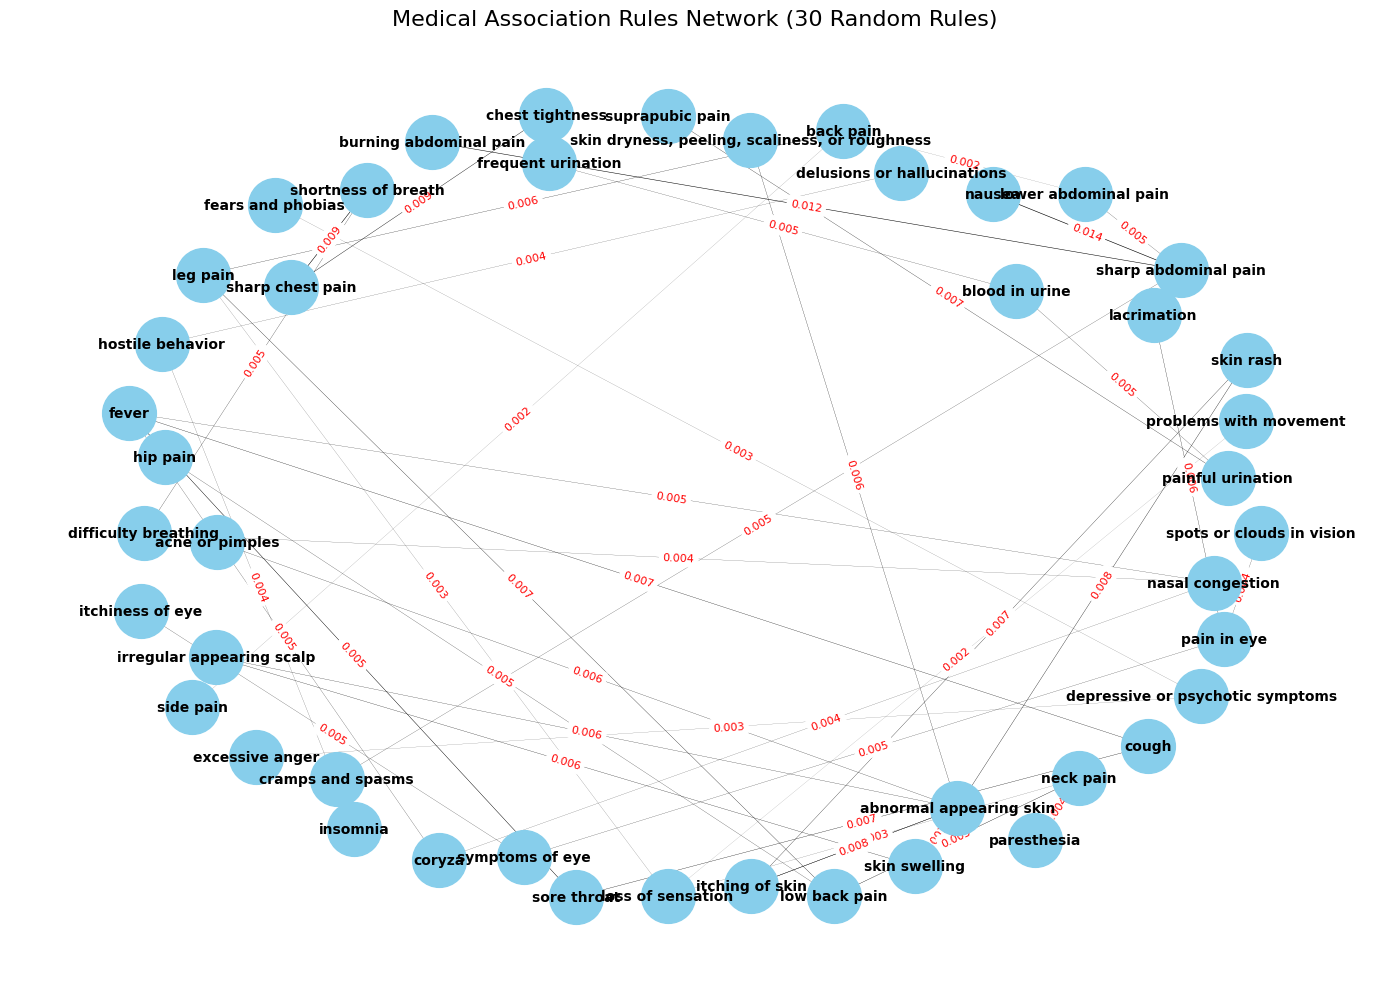

In [83]:
import networkx as nx
G = nx.DiGraph()

random_rules = combined_rules_df.sample(n=30, random_state=42)

for _, row in random_rules.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    fitness = row['fitness']

    # Expand to individual symptoms
    ant_items = list(antecedents) if isinstance(antecedents, (set, frozenset, tuple)) else [antecedents]
    con_items = list(consequents) if isinstance(consequents, (set, frozenset, tuple)) else [consequents]

    for ant in ant_items:
        ant_str = clean_label(ant)
        G.add_node(ant_str)
        for con in con_items:
            con_str = clean_label(con)
            G.add_node(con_str)
            G.add_edge(ant_str, con_str, weight=fitness, label=f"{fitness:.3f}")

# Draw
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.8, seed=42)
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=1500)
edges = G.edges(data=True)
weights = [d['weight'] * 30 for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, arrows=True, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.title("Medical Association Rules Network (30 Random Rules)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()